In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Apple"

/content/drive/My Drive/Apple


In [4]:
at = pd.read_csv('./Machine_Learning/Apple_attribute.csv')
apple_attribute = at.to_numpy()
sw = pd.read_csv('./Machine_Learning/Apple_sweetness.csv')
apple_sweetness = sw.to_numpy()
train_input, test_input, train_target, test_target = train_test_split(apple_attribute, apple_sweetness, test_size=0.2)

poly = PolynomialFeatures(degree=2)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [5]:
ridge = Ridge(alpha = 500)
ridge.fit(train_scaled, train_target)
print(round(ridge.score(train_scaled, train_target), 4))
print(round(ridge.score(test_scaled, test_target), 4))

0.5289
0.2276


In [ ]:
print(test_scaled[1])

[ 0.         -0.19090065 -0.25155392 ... -0.85951688 -1.00708664
 -1.3034534 ]


In [ ]:
print(ridge.predict(test_scaled[1]))

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt #Ridge alpha값 찾기
train_score = [] 
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
  full_ridge = Ridge(alpha=alpha)
  full_ridge.fit(train_scaled, train_target)
  train_score.append(full_ridge.score(train_scaled, train_target))
  test_score.append(full_ridge.score(test_scaled, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
full_lasso = Lasso(alpha = 0.1)
full_lasso.fit(train_scaled, train_target)
print(round(full_lasso.score(train_scaled, train_target), 4))
print(round(full_lasso.score(test_scaled, test_target), 4))

0.4912
-0.0815


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.861e+00, tolerance: 2.815e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.170e-01, tolerance: 2.815e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


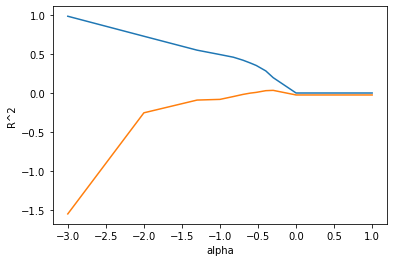

In [ ]:
import matplotlib.pyplot as plt #Lasso alpha값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 10]
for alpha in alpha_list:
  full_lasso = Lasso(alpha=alpha)
  full_lasso.fit(train_scaled, train_target)
  train_score.append(full_lasso.score(train_scaled, train_target))
  test_score.append(full_lasso.score(test_scaled, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
'''
하이퍼파라미터 튜닝하는 방법
1. Gridsearch CV
params = {alpha:[100, 200, 300]}

2. Optuna 
'''